In [49]:
import pandas as pd

### Cargando Conjunto de datos

In [50]:
medicamentos_df = pd.read_csv('Datos/drug200.csv')
medicamentos_df = medicamentos_df.sample(frac=1)
medicamentos_df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
156,31,M,HIGH,NORMAL,11.227,drugA
173,41,F,LOW,NORMAL,18.739,DrugY
184,18,F,HIGH,HIGH,37.188,DrugY


In [51]:
medicamentos_df.info()

<class 'pandas.DataFrame'>
Index: 200 entries, 156 to 167
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    str    
 2   BP           200 non-null    str    
 3   Cholesterol  200 non-null    str    
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    str    
dtypes: float64(1), int64(1), str(4)
memory usage: 10.9 KB


In [52]:
medicamentos_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [53]:
col_cat = ['Sex', 'BP', 'Cholesterol']
for col in col_cat:
    print(f'{col}: {medicamentos_df[col].value_counts()}')
    print('---' * 10)

Sex: Sex
M    104
F     96
Name: count, dtype: int64
------------------------------
BP: BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
------------------------------
Cholesterol: Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
------------------------------


In [54]:
medicamentos_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [55]:
medicamentos_df.duplicated().sum()

np.int64(0)

### Division en Prueba y Entrenamiento

In [56]:
from sklearn.model_selection import train_test_split

X = medicamentos_df.drop('Drug', axis=1).values
y = medicamentos_df.Drug.values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)

### Canalizacion de Aprendizaje Automatico

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [59]:
cat_col = [1, 2, 3]
num_col = [0, 4]

preprocesamiento = ColumnTransformer(
    transformers=[
        #Transformamos las variables categóricas a numéricas
        ('encoder', OrdinalEncoder(), cat_col),
        #Imputamos los valores faltantes de las variables numéricas con la mediana 
        ('num_imputer', SimpleImputer(strategy='median'), num_col),
        #Estandarizamos las variables numéricas
        ('num_scaler', StandardScaler(), num_col)
    ]
)

pipeline = Pipeline(
    steps= [
        ('preprocesamiento',preprocesamiento),
        ('modelo', RandomForestClassifier(n_estimators=100, random_state=125))
])

pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocesamiento', ...), ('modelo', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('encoder', ...), ('num_imputer', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the dif

### Evaluacion del Modelo

In [60]:
from sklearn.metrics import accuracy_score, f1_score

#Devuelve un array con las predicciones del modelo para el conjunto de prueba
predicciones = pipeline.predict(X_test)
#Devuelve el porcentaje de acierto del modelo para el conjunto de prueba
accuracy = accuracy_score(y_test, predicciones)
f1 = f1_score(y_test, predicciones, average='macro')

print("Accuracy:",str(round(accuracy, 2) * 100) + "%", "F1:", str(round(f1, 2)))

Accuracy: 93.0% F1: 0.77


In [61]:
#Guardamos las métricas en un archivo de texto
with open("Resultados/metricas.txt", "w") as outfile:
    outfile.write(f"\nAccuracy: = {round(accuracy, 2)}, F1 Score: = {round(f1, 2)}.")

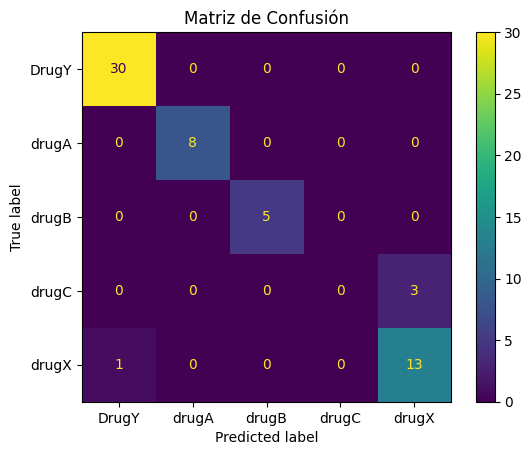

In [62]:
# install matplotlib if missing
#%pip install matplotlib --quiet

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicciones, labels=pipeline.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
display.plot()
plt.title("Matriz de Confusión")
plt.savefig("Resultados/matriz_confusion.png", dpi=300)

### Guardar el Modelo

In [63]:
# install skops if missing
#%pip install skops --quiet

import skops.io as sio

#Esto nos permitira guardar tanto el pipeline de scikit-learn como el modelo
sio.dump(pipeline, "Modelo/pipeline.skops")

In [64]:
#Se puede cargar el modelo con la funcion load de skops
sio.load("Modelo/pipeline.skops", trusted=['numpy.dtype'])

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocesamiento', ...), ('modelo', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('encoder', ...), ('num_imputer', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the dif